In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Phoneme Dataset
Load the phoneme dataset using Pandas

In [2]:
data = pd.read_csv('data/phoneme.csv')
#print(data)
#print(type(data))

### splitting train data from full data and removing 'row.names','speaker', 'g' columns----------------------------------
### getting train response column ----------------------------------------------
train_mask = data['speaker'].str.contains('train', case=False, na=False)
train_data = data[train_mask].drop(['row.names','speaker', 'g'], axis=1)
train_data_resp = data[train_mask]['g']
print(train_data_resp)  ## 3340 x 1
print(train_data)  ## 3340 x 256


### splitting test data from full data and removing 'row.names','speaker', 'g' columns----------------------------------
### getting test response column ----------------------------------------------
test_mask = data['speaker'].str.contains('test', case=False, na=False)
test_data = data[test_mask].drop(['row.names','speaker', 'g'], axis=1)
test_data_resp = data[test_mask]['g']
print(test_data_resp)  ## 1169 x 1
print(test_data)  ## 1169 x 256

#data1 = data[data['speaker'] == 'train']
#print(data1)
# TODO 
# Split the dataset into a train and test dataset according to column "speaker".
# Be sure to exclude row number, "speaker" and response columns from your features.

0        sh
1        iy
2       dcl
3       dcl
4        aa
       ... 
3335     iy
3336     aa
3337     sh
3338     ao
3339     ao
Name: g, Length: 3340, dtype: object
           x.1       x.2       x.3       x.4       x.5       x.6       x.7  \
0      9.85770   9.20711   9.81689   9.01692   9.05675   8.92518  11.28308   
1     13.23079  14.19189  15.34428  18.11737  19.53875  18.32726  17.34169   
2     10.81889   9.07615   9.77940  12.20135  12.59005  10.53364   8.54693   
3     10.53679   9.12147  10.84621  13.92331  13.52476  10.27831   8.97459   
4     12.96705  13.69454  14.91182  18.22292  18.45390  17.25760  17.79614   
...        ...       ...       ...       ...       ...       ...       ...   
3335   8.71574   6.63970  16.13753  17.59480  15.84771  13.73761  19.23975   
3336  12.09090  12.07206  15.06150  17.91977  17.37121  13.15412  13.50169   
3337  11.62867  11.51609  11.89907  11.93342  11.95919   9.44128   7.12836   
3338  12.08473  13.30547  16.92965  17.14066  13.09

### 2. LDA modelling
Fit an LDA model. Compute and report the train and test error.

In [3]:
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

### fitting LDA to train data -------------------------------------------
model = LinearDiscriminantAnalysis()
model.fit(train_data, train_data_resp)
print(model.coef_)

### train error -----------------------------------------------------------------------------
train_pred = model.predict(train_data)
#print(train_pred.shape)
#print(train_data_resp.shape)
score = accuracy_score(train_data_resp, train_pred)
print(score * 100) ## 94.40 %
train_error = 100 - (score * 100) ## 5.59 %
print(train_error)




### test error ------------------------------------------------------------------------------
test_pred = model.predict(test_data)
score = accuracy_score(test_data_resp, test_pred)
print(score * 100)  ## 91.96 %
test_error = 100 - (score * 100) ## 8.04 %
print(test_error)
# TODO

[[-0.31035161  0.02839349  0.20297612 ... -0.11653149  0.01010559
  -0.10703165]
 [-0.36215607  0.12691748  0.29213235 ... -0.11596635  0.01115323
  -0.13442108]
 [ 0.4642758  -0.36101529 -0.24715543 ...  0.05209739 -0.11004708
   0.10446323]
 [-0.05145304 -0.21700316 -0.34881639 ...  0.05358123 -0.10190352
   0.09673151]
 [ 0.33775298  0.42702267  0.16824052 ...  0.11353143  0.20826876
   0.02538804]]
94.40119760479043
5.5988023952095745
91.95893926432849
8.041060735671508


### 3. LDA canonical coordinates
 Plot the projection of the training data onto the first two canonical coordinates of the LDA and report your findings. Investigate the data projected on further dimensions using the \texttt{dimen} parameter.

In [4]:
train_data_resp.head()

0     sh
1     iy
2    dcl
3    dcl
4     aa
Name: g, dtype: object

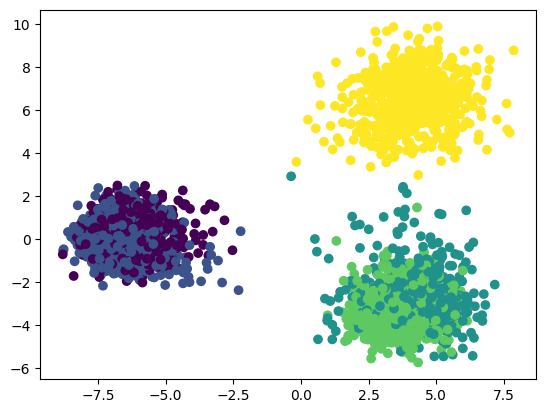

In [5]:
from sklearn import preprocessing

### fitting LDA model onto first two components ---------------------------------------- 
model = LinearDiscriminantAnalysis(n_components=2)
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in train response column.
train_data_resp= label_encoder.fit_transform(train_data_resp)
#print(train_data_resp)

np.unique(train_data_resp)
train_data_D2 = model.fit(train_data, train_data_resp).transform(train_data)

plt.figure()    
plt.scatter(train_data_D2[:,0],train_data_D2[:,1], c = train_data_resp)


### 4. LDA on "aa", "ao"
Select the two phonemes "aa" and "ao". Fit an LDA model on this data set and repeat the steps
    done in (2).

In [6]:
data2 = pd.read_csv('data/phoneme.csv')
#print(data2)

## splitting train data based on class 'aa' and 'ao' ---------------------------------------
trim_data = data2['g'].isin(['aa','ao'])
data2 = data2[trim_data]
train_mask2 = data2['speaker'].str.contains('train', case=False, na=False)
train_data2 = data2[train_mask2].drop(['row.names','speaker', 'g'], axis=1)
train_data2_resp = data2[train_mask2]['g']

print(train_data2) ## 1278 x 256


## splitting test data based on class 'aa' and 'ao' ---------------------------------------
test_mask2 = data2['speaker'].str.contains('test', case=False, na=False)
test_data2 = data2[test_mask2].drop(['row.names','speaker', 'g'], axis=1)
test_data2_resp = data2[test_mask2]['g']
#print(test_data2_resp)
print(test_data2) ## 439 x 256


## fitting LDA model to train data (repeating step 2)  -------------------------------------
model = LinearDiscriminantAnalysis()
model.fit(train_data2, train_data2_resp)


### train error -----------------------------------------------------------------------------
train_pred = model.predict(train_data2)
score = accuracy_score(train_data2_resp, train_pred)
print(score * 100) ## 89.36 %
train_error = 100 - (score * 100)
print(train_error) ## 10.64 %
print(train_pred)


### test error ------------------------------------------------------------------------------
test_pred = model.predict(test_data2)
score = accuracy_score(test_data2_resp, test_pred)
print(score * 100) ## 78.59 % 
test_error = 100 - (score * 100)
print(test_error) ## 21.41 %
print(test_pred)

# TODO

           x.1       x.2       x.3       x.4       x.5       x.6       x.7  \
4     12.96705  13.69454  14.91182  18.22292  18.45390  17.25760  17.79614   
6     10.95324  11.20585  16.17634  18.59300  17.50922  10.27798  16.00151   
8      9.37324  11.29505  17.15139  18.03336  14.95980  14.97031  18.63124   
9      9.48477  11.38758  16.74884  17.36141  14.67661  15.02621  18.28174   
13    11.62344  15.35490  18.85450  18.85172  14.21326  18.52945  20.11413   
...        ...       ...       ...       ...       ...       ...       ...   
3328   9.74357  15.23026  17.46805  16.23189  15.73793  18.47689  17.85606   
3333  11.64146  12.25616  17.04220  18.17339  15.47619  15.25918  19.29400   
3336  12.09090  12.07206  15.06150  17.91977  17.37121  13.15412  13.50169   
3338  12.08473  13.30547  16.92965  17.14066  13.09360  17.26574  19.11256   
3339  12.50446  13.94449  16.18002  16.87066  11.25393  16.60865  17.89792   

           x.8       x.9      x.10  ...     x.247    x.248    x

## 5. QDA
Repeat steps (b) and (d) using QDA and report your findings. Would you prefer LDA or QDA in this example? Why?

In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### getting train and train response data again ----------------------------------------------------
train_mask = data['speaker'].str.contains('train', case=False, na=False)
train_data = data[train_mask].drop(['row.names','speaker', 'g'], axis=1)
train_data_resp = data[train_mask]['g']
#print(train_data_resp)  ## 3340 x 1
#print(train_data)  ## 3340 x 256

### fitting QDA onto the data ----------------------------------------------------------------------
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(train_data, train_data_resp)


### train error ------------------------------------------------------------------------------------
train_pred2 = model2.predict(train_data)
score = accuracy_score(train_data_resp, train_pred2)
print(score * 100) ## 100 %
train_error = 100 - (score * 100)
print(train_error) ## 0 %

### test error  -----------------------------------------------------------------------------------
test_pred2 = model2.predict(test_data)
score = accuracy_score(test_data_resp, test_pred2)
print(score * 100) ## 84.17 %
test_error = 100 - (score * 100)
print(test_error) ## 15.82 %





### train error (step 4 data) -----------------------------------------------------------------------------------
model3 = qda.fit(train_data2, train_data2_resp)

train_pred3 = model3.predict(train_data2)
score = accuracy_score(train_data2_resp, train_pred3)
print(score * 100) ## 100 %
train2_error = 100 - (score * 100)
print(train2_error) ## 0 %

### test error (step 4 data)
test_pred3 = model3.predict(test_data2)
score = accuracy_score(test_data2_resp, test_pred3)
print(score * 100) ## 66.06 %
test2_error = 100 - (score * 100)
print(test2_error) ## 33.94 %



# TODO

100.0
0.0
84.17450812660393
15.825491873396075
100.0
0.0
66.05922551252847
33.94077448747153


QDA model is working best on training data as we can see that train error is 0%. But its performance reduces on test data as compare to LDA model, so we would prefer LDA over QDA because accuracy of the test data matters more than the train data. QDA seems to over fit the train data and shows poor performance on test data while LDA performs better on train as well as on test data.

## 6. Confusion Matrices
Generate confusion matrices for the LDA and QDA model for "aa" and "ao". Which differences can you observe between the models?

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
matrix_LDA = confusion_matrix(test_pred, test_data2_resp)
matrix_QDA = confusion_matrix(test_pred3, test_data2_resp)
print(matrix_LDA)
print(matrix_QDA)
print(classification_report(test_data2_resp, test_pred3, digits=3))

# TODO 

[[121  39]
 [ 55 224]]
[[ 29   2]
 [147 261]]
              precision    recall  f1-score   support

          aa      0.935     0.165     0.280       176
          ao      0.640     0.992     0.778       263

    accuracy                          0.661       439
   macro avg      0.788     0.579     0.529       439
weighted avg      0.758     0.661     0.578       439



Here, QDA is predicting most of 'aa' class as 'ao' while 'ao' classification is good. So QDA seems to be biased and poor classification method.
However, LDA does not seem to be as biased as QDA. LDA shows similar error distribution.